## Finding the Two Best Markets to Advertise In For an E-Learning Product

In this project our goal is to identify the two best markets to advertise our products in. We work for an E-Learning company that offers courses in program in topics that primarly focus on web and mobile development, but we also offer courses in data science, game development, and more.

### Understanding the Data

To avoid spending money on a costly survey, we will look to find an existing dataset to use. A good candidate is the freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform offering courses on web development.  Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey and data are both publically available on their GitHub repo, so we will connect to the repo and explore the dataset

In [1]:
# Read in the data
import pandas as pd
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning

print(fcc.shape)
pd.options.display.max_columns = 150 # to avoid truncated output 
fcc.head(5)

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Checking for Sample Representivity

Most of the courses we offer are on mobile and web development, but we also cover other domains as well. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
 
- Where are these new coders located
- What are the new locations with the greatest number of new coders
- How much money new coders are willing to spend on learning.

Before we start to analyze the sample data we have, we need to clarify whether it is representative of the population of interest and has the right categories of people for our purpose.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [2]:
fcc['JobRoleInterest'].value_counts(normalize=True) *100

Full-Stack Web Developer                                                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                                                  6.435927
  Data Scientist                                                                                                                                                           2.173913
Back-End Web Developer                                                                                                                                                     2.030892
  Mobile Developer                                                                                                                                                         1.673341
Game Developer                                                                                      

The information from the data is quite granular, but we can see that:

- Many people are interested in web-development (full-stack, back-end, front-end)
- Web development is more popular than mobile development
- There are a few people interested in roels outside of mobile and web development.

We also see that many people are interested in several different roles. It would be interested to see how many people are interested in single subjects and how many have mixed interests. We will explore that in the next codeblock.

In [3]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
split_interest = interests_no_nulls.str.split(',')
split_interest

num_interests = split_interest.apply(lambda x: len(x))
num_interests.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of respondents are interested in a single role and have a clear idea of the programming niche they are interested in. However, considering we offer courses in various subjects, it may be beneficial for us that this sample is interested in multiple subjects.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

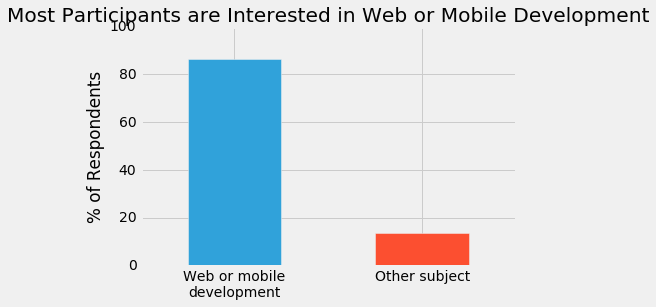

In [4]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
web_or_mob_ft = web_or_mobile.value_counts(normalize=True)*100

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

web_or_mob_ft.plot.bar()
plt.title('Most Participants are Interested in Web or Mobile Development')
plt.ylabel('% of Respondents')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

It turns out that 87% of the respondents in this survey are interested in web or mobile development. This gives us strong reason to consider that this sample is representative of the population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

### New Coders - Location and Densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location. This should be a good start to find which 2 markets are the best to run our ad campaigns in. 

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [5]:
country_data = fcc[fcc['JobRoleInterest'].notnull()].copy()

country_abs = country_data['CountryLive'].value_counts()
country_rel = country_data['CountryLive'].value_counts(normalize=True)*100

In [6]:
pd.DataFrame(data = {'Absolute Frequency': country_abs,'Relative Frequency':country_rel})

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of respondents are located in the United States, and this definitely seems like the most interesting market. India is the second most popular market, with 7.7% of respondents living in India. However, India's 7.7% is close to the United Kingdom (4.6%) and Canada (3.8%). 

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

# Spending Money for Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We will narrow down our analysis to only four countries: the US, India, the UK, and Canada. We do this for two reasons:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [7]:
country_data['MonthsProgramming'].replace(0,1, inplace = True)

# New column for the amount of money each student spends each month
country_data['money_per_month'] = country_data['MoneyForLearning'] / country_data['MonthsProgramming']
country_data['money_per_month'].isnull().sum()

675

There are 675 null values for this new metric created. We will remove any rows that have a null value for this new column and if CountryLive is a null value.

In [8]:
country_data = country_data[country_data['money_per_month'].notnull()].copy()
country_data = country_data[country_data['CountryLive'].notnull()].copy()

We want to group the data by country, and then measure the average amount of money that students spend per month in each country.

In [9]:
top_countries = country_data[country_data['CountryLive'].isin(['United States of America',
                            'India', 'United Kingdom',
                            'Canada'])]

spending_grouped = top_countries.groupby('CountryLive').mean()
spending_grouped['money_per_month'].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

### Dealing with Extreme Outliers

Let's use box plots to visualize the distribution of the money_per_month variable for each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


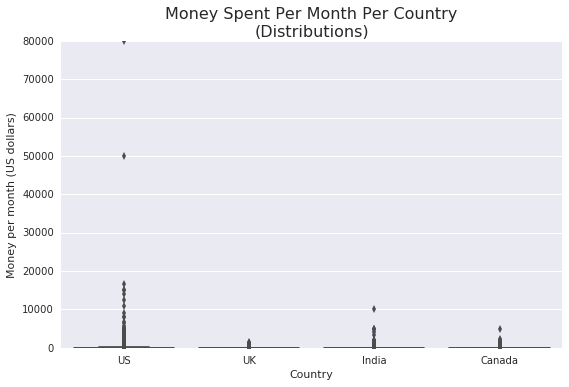

In [10]:
import seaborn as sns
sns.boxplot(x='CountryLive',y='money_per_month',data=top_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month and recalculate the average amount spend per month by country.

In [11]:
top_countries = top_countries[top_countries['money_per_month'] < 20000]

spending_grouped = top_countries.groupby('CountryLive').mean()
spending_grouped['money_per_month'].sort_values(ascending=False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


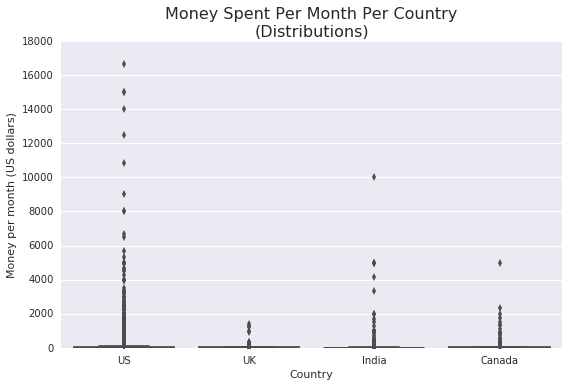

In [12]:
import seaborn as sns
sns.boxplot(x='CountryLive',y='money_per_month',data=top_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [13]:
India_outliers = top_countries[(top_countries['CountryLive'] == 'India') & (top_countries['money_per_month'] > 2500)]
India_outliers[['money_per_month','AttendedBootcamp','MonthsProgramming']]

,money_per_month,AttendedBootcamp,MonthsProgramming
1728,5000.000000,0.0,4.0
1755,3333.333333,0.0,15.0
7989,5000.000000,0.0,1.0
8126,5000.000000,0.0,1.0
13398,10000.000000,0.0,2.0
15587,4166.666667,0.0,24.0


It seems no student attended a bootcamp. It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these six rows.

In [14]:
top_countries = top_countries.drop(India_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [15]:
us_outliers = top_countries[(top_countries['CountryLive'] == 'United States of America') & (top_countries['money_per_month'] > 6000)]
us_outliers[['money_per_month','AttendedBootcamp','MonthsProgramming']]

,money_per_month,AttendedBootcamp,MonthsProgramming
718,8000.000000,1.0,1.0
1222,6500.000000,1.0,2.0
3184,9000.000000,1.0,1.0
3930,10833.333333,0.0,6.0
6805,15000.000000,1.0,1.0
7198,14000.000000,0.0,5.0
7505,6666.666667,1.0,3.0
9778,8000.000000,1.0,1.0
16650,16666.666667,0.0,12.0
16997,12500.000000,0.0,1.0


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove these eight outliers.

In [16]:
no_bootcamp = top_countries[
    (top_countries['CountryLive'] == 'United States of America') & 
    (top_countries['money_per_month'] >= 6000) &
    (top_countries['AttendedBootcamp'] == 0)
]

top_countries.drop(no_bootcamp.index,inplace=True)

less_than_3_months = top_countries[
    (top_countries['CountryLive'] == 'United States of America') & 
    (top_countries['money_per_month'] >= 6000) &
    (top_countries['MonthsProgramming'] <= 3)
]

top_countries.drop(less_than_3_months.index,inplace=True)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.

In [20]:
canada_outlier = top_countries[
    (top_countries['CountryLive'] == 'Canada') & 
    (top_countries['money_per_month'] >= 4500)]
    
canada_outlier[['AttendedBootcamp','MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming
13659,1.0,2.0



Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [21]:
top_countries.drop(canada_outlier.index,inplace=True)

In [22]:
spending_grouped = top_countries.groupby('CountryLive').mean()
spending_grouped['money_per_month'].sort_values(ascending=False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


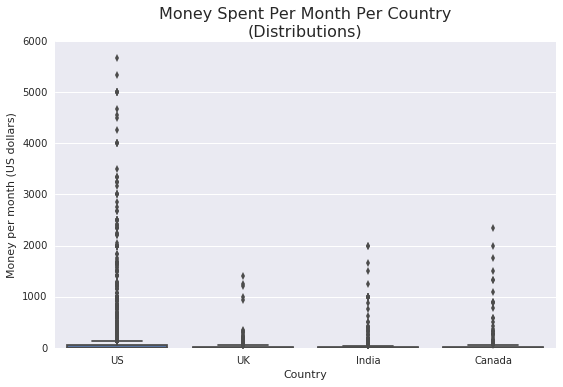

In [24]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = top_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

We need to choose one more market though.

We sell subscriptions at $59/month. It would make sense to choose Canada as they are the second highest country in terms of money spend per month at \$93/month, compared to India (\$66) and the United Kingdom (\$45). 

The data strongly suggest we should not spend in the U.K. Their average money spent per month is less than the cost of our subscriptions, so they will likely not sign up for our subscriptions.

Let's take a second look at India before deciding to choose Canada as our second best choice:

- $59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
- We have almost twice as more potential customers in India than we have in Canada:

In [25]:
top_countries['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

There is no clear cut choice for the second market we should try to advertise in. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point we have several options:

- Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.

- Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.

- Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.